In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('D:/data/result.csv')

图表类型
resource：扇贝编程
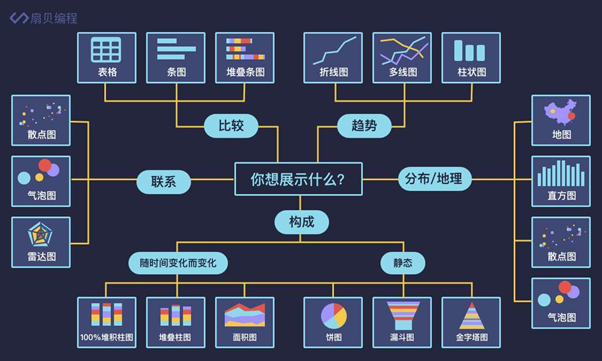

-趋势：时间序列关系，关心数据如何随着时间变化，趋势类里的图表能直观反映出每年、每月、每天的变化趋势，增长、减少、上下波动还是基本不变。最常见的是折线图:plt.legend() ，它能很好地表现指标随时间呈现的趋势。

-构成：主要关注每个部分占整体的比例，如果你想分析的目标诸如“份额”、“百分比”等。展示构成关系的图表类型里，最常见的就是饼图：plt.pie()

-比较：可以展示某个维度上的排列顺序，分析某维度之间的对比是差不多，还是 “大于”、“小于”，比如分析男生和女生的身高差别。

-分布：当你关心数据集中、频率、分布时，比如根据地理位置数据，通过地图来展示不同分布特征。比较常用的图表有地图、直方图、散点图。

-联系：主要查看两个变量之间是否表达出我们预期所要证明的相关关系。比如预期销售额可能随着优惠折扣的增长而增长，常用于表达“与……有关”、“随……而增长”、“随……而不同”等维度间的关系。

1. 柱状图：
plt.bar() 需要传入两个参数，第一个参数是 x 轴上刻度的标签序列（列表、元组、数组等），第二个参数则用于指定每个柱子的高度，也就是具体的数据.

In [5]:
df.head(3)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S


任务一：可视化展示泰坦尼克号数据集中男女中生存人数分布情况（用柱状图试试）

Text(0.5, 1.0, 'Survivor')

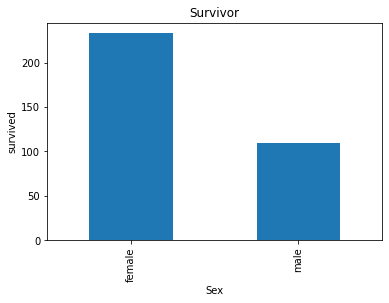

In [16]:
sex=df.groupby('Sex')['Survived'].sum()
sex.plot.bar()
plt.ylabel('survived')
plt.title('Survivor')

任务二：可视化展示泰坦尼克号数据集中男女中生存人与死亡人数的比例图（用柱状图试试）

In [37]:
sex=df.groupby(['Sex','Survived'])['Survived'].count()
sex

Sex     Survived
female  0.0          81
        1.0         233
male    0.0         468
        1.0         109
Name: Survived, dtype: int64

In [53]:
sex1=sex.unstack()
sex

Survived  Sex   
0.0       female     81
          male      468
1.0       female    233
          male      109
dtype: int64

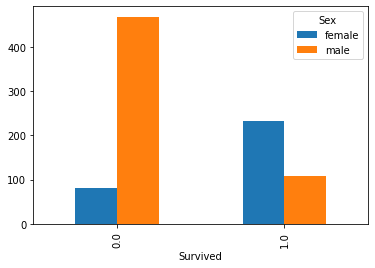

In [55]:
sex1.plot.bar()

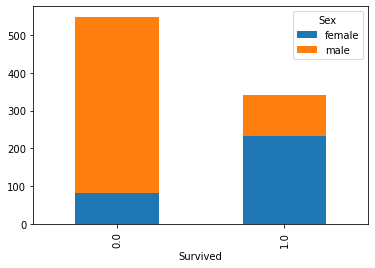

In [54]:
sex1.plot.bar(stacked=True)    #stack堆叠作用

任务三：可视化展示泰坦尼克号数据集中不同票价的人生存和死亡人数分布情况。（用折线图试试）（横轴是不同票价，纵轴是存活人数）

In [67]:
df=pd.read_csv('D:/data/result.csv')
fare=df.groupby(['Fare'])['Survived'].value_counts().sort_values(ascending=False)
fare

Fare     Survived
8.0500   0.0         38
7.8958   0.0         37
13.0000  0.0         26
7.7500   0.0         22
26.0000  0.0         16
                     ..
20.2500  1.0          1
         0.0          1
18.7875  1.0          1
         0.0          1
15.0500  0.0          1
Name: Survived, Length: 330, dtype: int64

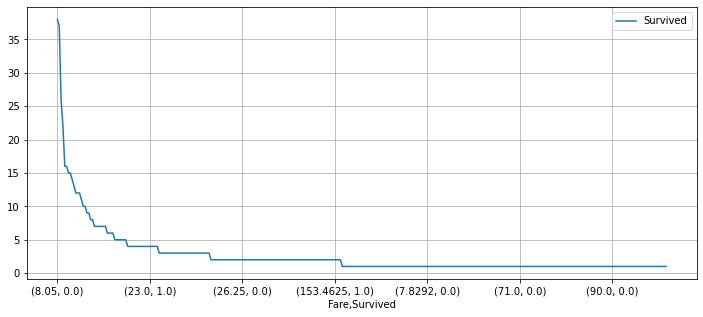

In [80]:
fare.plot(figsize=(12,5))
plt.grid()
plt.legend()

任务五：可视化展示泰坦尼克号数据集中不同仓位等级的人生存和死亡人员的分布情况。（用柱状图试试）

In [82]:
df=pd.read_csv('D:/data/result.csv')
Pclass=df.groupby(['Pclass'])['Survived'].value_counts()
Pclass

Pclass  Survived
1.0     1.0         136
        0.0          80
2.0     0.0          97
        1.0          87
3.0     0.0         372
        1.0         119
Name: Survived, dtype: int64

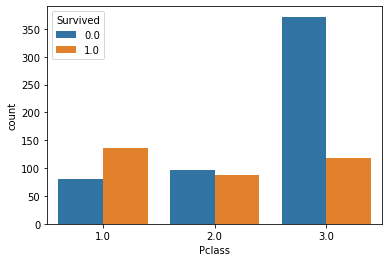

In [94]:
import seaborn as sns
sns.countplot(x='Pclass', hue='Survived',data=df)

seaborn.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
Show the counts of observations in each categorical bin using bars.

任务五：可视化展示泰坦尼克号数据集中不同年龄的人生存与死亡人数分布情况。(不限表达方式)

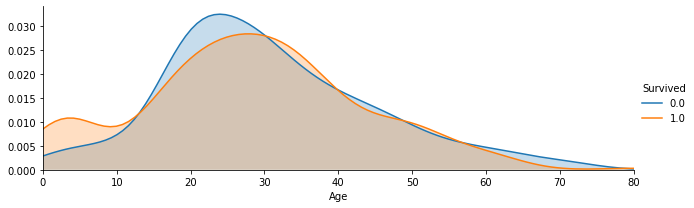

In [98]:
facet = sns.FacetGrid(df, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

任务六：可视化展示泰坦尼克号数据集中不同仓位等级的人年龄分布情况。（用折线图试试）

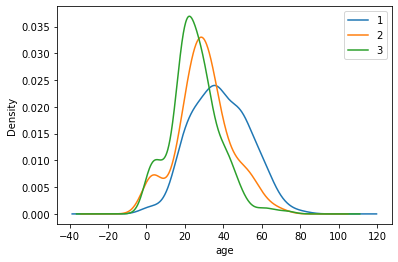

In [100]:
df.Age[df.Pclass == 1].plot(kind='kde')
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
plt.xlabel("age")
plt.legend((1,2,3),loc="best")